<a href="https://colab.research.google.com/github/1024-m/nlp-bots/blob/main/Telugu_NLP_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [ ]:
train_path = "/content/drive/MyDrive/nlp/train_telugu_news.csv"
telugu_news_df = pd.read_csv(train_path)
telugu_news_df

,SNo,date,heading,body,topic
0,414,11-05-2017 00:39:13,ఐడిబిఐపై ఆర్‌బిఐ నజర్‌,భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ ...,business
1,2668,12-06-2017 00:40:32,బ్యాంకింగ్‌ చీఫ్‌లతో నేడు జైట్లీ భేటీ,న్యూఢిల్లీ : ఆర్థిక మంత్రి అరుణ్‌ జైట్లీ సోమవా...,business
2,19923,19-01-2017 19:51:31,కీలక వికెట్ తీసిన జడేజా..,కటక్: ఇంగ్లండ్‌తో జరుగుతున్న సెకండ్ వన్డే మ్యా...,sports
3,15762,23-11-2017 17:29:04,మరో రెచ్చగొట్టే చర్యకు దిగిన పాకిస్థాన్,\nఇస్లామాబాద్ : పాకిస్థాన్ అంతర్జాతీయ ఉగ్రవాది...,nation
4,8624,03-04-2017 15:48:23,గోవాలో కొడుకుతో కలిసి అల్లు అర్జున్ స్విమ్మింగ్!,స్టార్‌ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటి...,entertainment
...,...,...,...,...,...
17307,10296,02-02-2017 12:18:11,"చిరు,ఎన్టీఆర్ వల్ల కాజల్‌కు దక్కిందేమిటి..?",ఇండస్ట్రీలో హీరోయిన్‌గా రాణించాలంటే కేవలం గ్లా...,entertainment
17308,13641,20-12-2017 04:16:32,"హిమాచల్‌ సీఎం రేసులో నడ్డా, జైరామ్‌","షిమ్లా, డిసెంబరు 19: హిమాచల్‌ ప్రదేశ్‌ అసెంబ్ల...",nation
17309,17288,20-05-2017 03:00:10,సతతహరిత విప్లవం అవసరం,2022 నాటికి రైతుల ఆదాయం రెట్టింపు చేయడానికి క...,nation
17310,20882,13-06-2017 04:30:36,ఇంగ్లండ్‌ జెర్సీలో వార్న్‌..!,పందెంలో ఓడిన షేనలండన్: ఆస్ట్రేలియా స్పిన్ లెజె...,sports


In [ ]:
del telugu_news_df["heading"]
del telugu_news_df["SNo"]

In [ ]:
telugu_news_df

,date,body,topic
0,11-05-2017 00:39:13,భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ ...,business
1,12-06-2017 00:40:32,న్యూఢిల్లీ : ఆర్థిక మంత్రి అరుణ్‌ జైట్లీ సోమవా...,business
2,19-01-2017 19:51:31,కటక్: ఇంగ్లండ్‌తో జరుగుతున్న సెకండ్ వన్డే మ్యా...,sports
3,23-11-2017 17:29:04,\nఇస్లామాబాద్ : పాకిస్థాన్ అంతర్జాతీయ ఉగ్రవాది...,nation
4,03-04-2017 15:48:23,స్టార్‌ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటి...,entertainment
...,...,...,...
17307,02-02-2017 12:18:11,ఇండస్ట్రీలో హీరోయిన్‌గా రాణించాలంటే కేవలం గ్లా...,entertainment
17308,20-12-2017 04:16:32,"షిమ్లా, డిసెంబరు 19: హిమాచల్‌ ప్రదేశ్‌ అసెంబ్ల...",nation
17309,20-05-2017 03:00:10,2022 నాటికి రైతుల ఆదాయం రెట్టింపు చేయడానికి క...,nation
17310,13-06-2017 04:30:36,పందెంలో ఓడిన షేనలండన్: ఆస్ట్రేలియా స్పిన్ లెజె...,sports


In [ ]:
telugu_news_df["topic"].unique()

array(['business', 'sports', 'nation', 'entertainment', 'editorial'],
      dtype=object)

In [ ]:
topic_dic = {}
temp1 = 0
for un in telugu_news_df["topic"].unique():
    if un not in topic_dic:
        topic_dic[un] = temp1
        temp1 += 1
topic_dic

{'business': 0, 'sports': 1, 'nation': 2, 'entertainment': 3, 'editorial': 4}

In [ ]:
inv_topic_dict = {v: k for k, v in topic_dic.items()}

In [ ]:
def func_topic(s):
    return topic_dic[s]
telugu_news_df["topic"] = telugu_news_df["topic"].apply(func_topic)

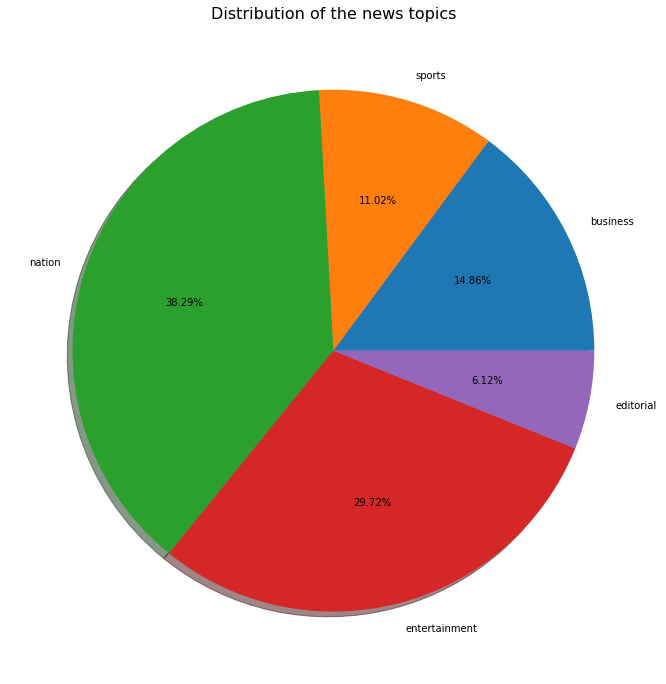

In [ ]:
def get_count(df):
    unvals = list(df.unique())
    op = [0]*len(unvals)
    i = 0
    for un in unvals:
        op[i] = df[df == un].shape[0]
        i += 1
    return [list(unvals),op]
cont = get_count(telugu_news_df["topic"])
clables = cont[0]
labels = []
for c in clables:
    labels.append(inv_topic_dict[c])
plt.figure(figsize=(16,12))
plt.title("Distribution of the news topics", fontsize=16)
plt.style.use('seaborn-colorblind')
plt.pie(np.array(cont[1]), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [ ]:
date_df = telugu_news_df["date"]
del telugu_news_df["date"]

In [ ]:
!pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.8 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 139 (delta 2), reused 2 (delta 0), pack-reused 126
Receiving objects: 100% (139/139), 149.77 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (28/28), done.


In [ ]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git

Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 1325, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1325 (delta 91), reused 82 (delta 82), pack-reused 1218
Receiving objects: 100% (1325/1325), 9.55 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (701/701), done.


In [ ]:
import sys
from indicnlp import common
INDIC_NLP_LIB_HOME=r"indic_nlp_library"
INDIC_NLP_RESOURCES=r"indic_nlp_resources"
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))
common.set_resources_path(INDIC_NLP_RESOURCES)

In [ ]:
from indicnlp.tokenize import sentence_tokenize
indic_string = telugu_news_df["body"][0]
sentences=sentence_tokenize.sentence_split(indic_string, lang='te')
for t in sentences:
    print(t)

భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ వ్యవహారాలపై భారత రిజర్వు బ్యాంకు (ఆర్‌బిఐ) ఒక కన్నేసింది.
ఐడిబిఐ బ్యాంకును ఆర్‌బిఐ వాచ్‌లి్‌స్టలో చేర్చినట్టుగా తెలిసింది.
నికర మొండిపద్దుల మొత్తం 6 శాతం దాటడం, వరసగా రెండేళ్ల పాటు నష్టాలను  ప్రకటించడం, కాపిటల్‌ అడెక్వసీ నిర్దేశిత ప్రమాణాల కంటే తగ్గడం. . . ఈ సందర్భాల్లో బ్యాంకులను ఆర్‌బిఐ వాచ్‌ లిస్ట్‌లో చేరుస్తుంది.
తమ బ్యాంకుకు సంబంధించి ఆర్‌బిఐ ప్రాంప్ట్‌ కరెక్టీవ్‌ యాక్షన్‌ (పిసిఎ) చేపట్టినట్టు ఐడిబిఐ వెల్లడించింది.
గతంలో ఓవర్సీస్‌ బ్యాంక్‌, యునైటెడ్‌ బ్యాంక్‌కు సంబంధించి  కూడా ఆర్‌బిఐ పిసిఎ చేపట్టింది.
పిసిఎ వల్ల బ్యాంకుపై ఆర్థికంగా భారం పడదనీ, దీనివల్ల అంతర్గత నియంత్రణలు మెరుగుపడటంతో పాటు, కార్యకలాపాలు మెరుగవుతాయని ఐడిబిఐ వివరించింది.
ఆర్‌బిఐ ఆదేశాలకు అనుగుణంగా ఇప్పుడు మూలధనాన్ని పొదుపుగా వినియోగించడంపై  ఐడిబిఐ దృష్టి సారించాల్సి ఉంటుంది.
ఇందులో భాగంగా పరపతిపై నియంత్రణలు విధించడం, నియామకాలను నిలిపేయడం, కొత్త పెట్టుబడి పథకాలను పక్కన బెట్టడంవంటి చర్యలు తీసుకోవాల్సి ఉంటుం ది.
బ్యాంకు సరైన రీతిలో స్పందించని పక్షంలో మరో బలమైన బ్యాంకులో  వి

In [ ]:
telugu_news_df["body_processed"] = telugu_news_df["body"].str.replace('\u200c','')
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].str.replace('\n','')
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].str.replace('\t','')
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].str.replace('\xa0','')

In [ ]:
PUNCT = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT))

In [ ]:
telugu_news_df["body_processed"][1024]

'భారత రహస్యంగా అణు నగరాన్ని నిర్మిస్తోంది. అణ్వాయుధ సంపత్తిని రోజురోజుకీ పెంచుకుంటున్న భారత.. ఉపఖండంలో ప్రశాంత వాతావరణాన్ని దెబ్బతీస్తోంది. అంతేకాక ఖండాతర క్షిపణులను కూడా పరీక్షిస్తూ ఆయుధ పోటీకి తెరతీస్తోంది. భారత దుందుడుకు చర్యలను అంతర్జాతీయ సమాజం అడ్డుకోవాలి.- నఫీజ్ జకారియాపాకిస్థాన్ విదేశాంగ శాఖ ప్రతినిధి'

In [ ]:
from indicnlp.tokenize import sentence_tokenize
tot_telugu_text1 = ""
for t in telugu_news_df["body_processed"]:
  tot_telugu_text1 += t
tot_sentences = sentence_tokenize.sentence_split(tot_telugu_text1,lang='te')
print(len(tot_sentences))

273291


In [ ]:
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].apply(lambda text: remove_punctuation(text))

In [ ]:
del telugu_news_df["body"]

In [ ]:
tot_telugu_text = ""
c = 1
for t in telugu_news_df["body_processed"]:
  tot_telugu_text += t
  c += 1
print(c)

17313


In [ ]:
len(tot_telugu_text)

23917934

In [ ]:
from indicnlp.tokenize import indic_tokenize  
vocab_dic  = {}
tokenized_text = []
heap_arr = []
for t in indic_tokenize.trivial_tokenize(tot_telugu_text):
    tokenized_text.append(t)
    heap_arr.append(len(vocab_dic))
    if t not in vocab_dic:
      vocab_dic[t] = 1
    else:
      vocab_dic[t] += 1

In [ ]:
len(vocab_dic), len(tokenized_text), len(heap_arr)

(328911, 2932015, 2932015)

In [ ]:
from nltk.probability import FreqDist 
freq_dist = FreqDist(vocab_dic)

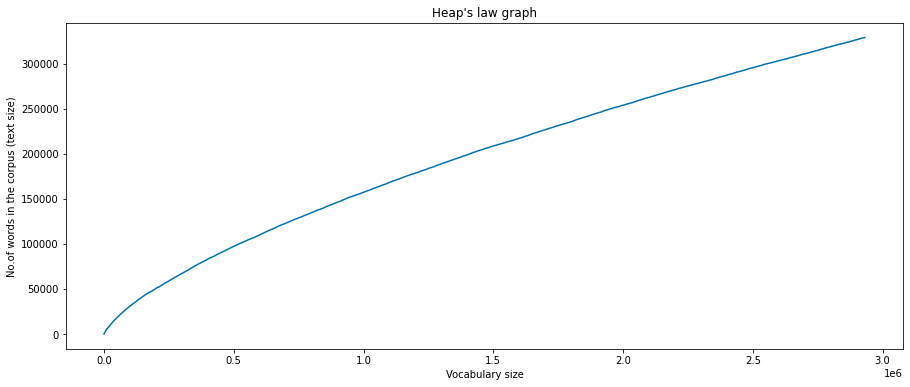

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(heap_arr)
plt.title("Heap's law graph")
plt.xlabel("Vocabulary size")
plt.ylabel("No.of words in the corpus (text size)")
plt.show()

In [ ]:
vocab_dic_sorted = {k: v for k, v in sorted(vocab_dic.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
top_k_words = []
k = 50
c = 0
for key in vocab_dic_sorted.keys():
  if c == k:
    break
  top_k_words.append([key, vocab_dic_sorted[key]])
  c += 1

In [ ]:
top_k_words_df = pd.DataFrame(top_k_words)
top_k_words_df.columns = ["word", "freq"]
top_k_words_df.head()

,word,freq
0,ఈ,38682
1,కూడా,16856
2,ఆ,15523
3,నుంచి,12650
4,ఆయన,9968


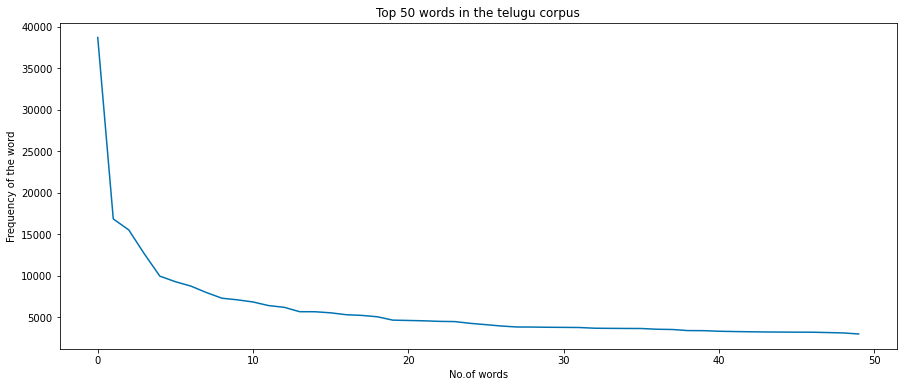

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(top_k_words_df["freq"])
plt.title("Top 50 words in the telugu corpus")
plt.xlabel("No.of words")
plt.ylabel("Frequency of the word")
plt.show()

In [ ]:
telugu_words = list(vocab_dic_sorted.keys())

In [ ]:
tot_sentences_proc = []
for sen in tot_sentences:
  tot_sentences_proc.append(remove_punctuation(sen))

In [ ]:
tot_sentences_proc[0]

'భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ వ్యవహారాలపై భారత రిజర్వు బ్యాంకు ఆర్బిఐ ఒక కన్నేసింది'

In [ ]:
from nltk.util import ngrams
bigrams_telugu_vocab = {}
for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  bigram = list(ngrams(tokens, 2)) 
  for big in bigram:
    if tuple(big) not in bigrams_telugu_vocab:
      bigrams_telugu_vocab[tuple(big)] = 1
    else:
      bigrams_telugu_vocab[tuple(big)] += 1

In [ ]:
bigrams_telugu_vocab = {k: v for k, v in sorted(bigrams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}
print("Total no.of unique bi-grams :- ", len(bigrams_telugu_vocab))

Total no.of unique bi-grams :-  1609783


In [ ]:
k = 30
print("Top" ,k ,"most-occuring bi-grams in the corpus are\n")
c = 0
for key in bigrams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", bigrams_telugu_vocab[key])
  c += 1

Top 30 most-occuring bi-grams in the corpus are

('ఈ', 'సినిమా')  ->  2016
('ఆ', 'తర్వాత')  ->  1275
('ఈ', 'ఏడాది')  ->  995
('కోట్ల', 'రూపాయల')  ->  976
('ఈ', 'సందర్భంగా')  ->  963
('సంగతి', 'తెలిసిందే')  ->  898
('అయితే', 'ఈ')  ->  824
('విషయం', 'తెలిసిందే')  ->  808
('ఈ', 'నేపథ్యంలో')  ->  800
('ఈ', 'సినిమాలో')  ->  794
('ఈ', 'నెల')  ->  788
('నోట్ల', 'రద్దు')  ->  767
('వ్యక్తం', 'చేశారు')  ->  720
('గత', 'ఏడాది')  ->  670
('నరేంద్ర', 'మోదీ')  ->  659
('ప్రధాని', 'మోదీ')  ->  640
('సోషల్', 'మీడియాలో')  ->  630
('ఈ', 'చిత్రం')  ->  629
('ఆయన', 'చెప్పారు')  ->  556
('పెద్ద', 'నోట్ల')  ->  542
('కేంద్ర', 'ప్రభుత్వం')  ->  534
('ఆ', 'సినిమా')  ->  531
('అవకాశం', 'ఉంది')  ->  518
('ఈ', 'మేరకు')  ->  502
('స్పష్టం', 'చేశారు')  ->  490
('ఇప్పటి', 'వరకు')  ->  466
('ఈ', 'విషయాన్ని')  ->  461
('ఆ', 'పార్టీ')  ->  451
('చాలా', 'మంది')  ->  450
('కోట్ల', 'రూపాయలు')  ->  441


In [ ]:
trigrams_telugu_vocab = {}
for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  trigram = list(ngrams(tokens, 3)) 
  for trig in trigram:
    if tuple(trig) not in trigrams_telugu_vocab:
      trigrams_telugu_vocab[tuple(trig)] = 1
    else:
      trigrams_telugu_vocab[tuple(trig)] += 1
trigrams_telugu_vocab = {k: v for k, v in sorted(trigrams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
k = 30
print("Top" ,k ,"most-occuring tri-grams in the corpus are\n")
c = 0
for key in trigrams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", trigrams_telugu_vocab[key])
  c += 1

Top 30 most-occuring tri-grams in the corpus are

('పెద్ద', 'నోట్ల', 'రద్దు')  ->  427
('హైదరాబాద్', 'ఆంధ్రజ్యోతి', 'బిజినెస్')  ->  240
('ప్రధాని', 'నరేంద్ర', 'మోదీ')  ->  219
('కోట్ల', 'రూపాయల', 'నుంచి')  ->  165
('మంత్రి', 'అరుణ్', 'జైట్లీ')  ->  156
('ప్రధాన', 'మంత్రి', 'నరేంద్ర')  ->  152
('ఆర్థిక', 'మంత్రి', 'అరుణ్')  ->  136
('సమయానికి', 'క్లోజ్', 'చేసుకోవాలి')  ->  124
('మంత్రి', 'నరేంద్ర', 'మోదీ')  ->  118
('ఈ', 'సినిమా', 'షూటింగ్')  ->  115
('కాంగ్రెస్', 'ఉపాధ్యక్షుడు', 'రాహుల్')  ->  113
('అమెరికా', 'అధ్యక్షుడు', 'డొనాల్డ్')  ->  108
('అధ్యక్షుడు', 'డొనాల్డ్', 'ట్రంప్')  ->  107
('ఈ', 'సినిమా', 'కోసం')  ->  106
('ఉపాధ్యక్షుడు', 'రాహుల్', 'గాంధీ')  ->  106
('చేసిన', 'సంగతి', 'తెలిసిందే')  ->  105
('కేంద్ర', 'ఆర్థిక', 'మంత్రి')  ->  99
('ఈ', 'సందర్భంగా', 'ఆయన')  ->  98
('భారతీయ', 'జనతా', 'పార్టీ')  ->  96
('ఆగ్రహం', 'వ్యక్తం', 'చేశారు')  ->  94
('ప్రధాన', 'మద్దతు', 'స్థాయి')  ->  93
('నోట్ల', 'రద్దు', 'వల్ల')  ->  89
('ఆవేదన', 'వ్యక్తం', 'చేశారు')  ->  86
('కాంగ్రెస్', 'సీనియర

In [ ]:
print("Total no.of unique tri-grams :- ", len(trigrams_telugu_vocab))

Total no.of unique tri-grams :-  1998929


In [ ]:
four_grams_telugu_vocab = {}
for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  fourgram = list(ngrams(tokens, 4)) 
  for fourg in fourgram:
    if tuple(fourg) not in four_grams_telugu_vocab:
      four_grams_telugu_vocab[tuple(fourg)] = 1
    else:
      four_grams_telugu_vocab[tuple(fourg)] += 1
four_grams_telugu_vocab = {k: v for k, v in sorted(four_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
k = 30
print("Top" ,k ,"most-occuring 4-grams in the corpus are\n")
c = 0
for key in four_grams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", four_grams_telugu_vocab[key])
  c += 1

Top 30 most-occuring 4-grams in the corpus are

('ఆర్థిక', 'మంత్రి', 'అరుణ్', 'జైట్లీ')  ->  119
('ప్రధాన', 'మంత్రి', 'నరేంద్ర', 'మోదీ')  ->  117
('కాంగ్రెస్', 'ఉపాధ్యక్షుడు', 'రాహుల్', 'గాంధీ')  ->  89
('అమెరికా', 'అధ్యక్షుడు', 'డొనాల్డ్', 'ట్రంప్')  ->  87
('ట్రేడింగ్కు', 'ప్రారంభ', 'స్థాయి', 'కీలకం')  ->  77
('అంతకన్నా', 'దిగువన', 'మాత్రమే', 'షార్ట్')  ->  77
('దిగువన', 'మాత్రమే', 'షార్ట్', 'పొజిషన్లు')  ->  77
('మాత్రమే', 'షార్ట్', 'పొజిషన్లు', 'శ్రేయస్కరం')  ->  77
('ఇంట్రాడే', 'ట్రేడింగ్కు', 'ప్రారంభ', 'స్థాయి')  ->  75
('ట్రేడింగ్', 'వ్యూహం', 'నిఫ్టీ', 'ఫ్యూచర్స్')  ->  70
('కేంద్ర', 'ఆర్థిక', 'మంత్రి', 'అరుణ్')  ->  69
('వాస్తవిక', 'కదలికల', 'ఆధారంగా', 'నిర్ణయాలు')  ->  66
('కదలికల', 'ఆధారంగా', 'నిర్ణయాలు', 'తీసుకోవాలి')  ->  66
('మార్కెట్', 'వాస్తవిక', 'కదలికల', 'ఆధారంగా')  ->  65
('అంశాల', 'ఆధారంగా', 'ఇచ్చిన', 'సూచన')  ->  63
('ఇది', 'పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల')  ->  62
('పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా')  ->  62
('ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధా

In [ ]:
print("Total no.of unique 4-grams :- ", len(four_grams_telugu_vocab))

Total no.of unique 4-grams :-  1882201


In [ ]:
five_grams_telugu_vocab = {}
for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  fivegram = list(ngrams(tokens, 5)) 
  for fiveg in fivegram:
    if tuple(fiveg) not in five_grams_telugu_vocab:
      five_grams_telugu_vocab[tuple(fiveg)] = 1
    else:
      five_grams_telugu_vocab[tuple(fiveg)] += 1
five_grams_telugu_vocab = {k: v for k, v in sorted(five_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
k = 30
print("Top" ,k ,"most-occuring 5-grams in the corpus are\n")
c = 0
for key in five_grams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", five_grams_telugu_vocab[key])
  c += 1

Top 30 most-occuring 5-grams in the corpus are

('అంతకన్నా', 'దిగువన', 'మాత్రమే', 'షార్ట్', 'పొజిషన్లు')  ->  77
('దిగువన', 'మాత్రమే', 'షార్ట్', 'పొజిషన్లు', 'శ్రేయస్కరం')  ->  77
('ఇంట్రాడే', 'ట్రేడింగ్కు', 'ప్రారంభ', 'స్థాయి', 'కీలకం')  ->  75
('వాస్తవిక', 'కదలికల', 'ఆధారంగా', 'నిర్ణయాలు', 'తీసుకోవాలి')  ->  66
('మార్కెట్', 'వాస్తవిక', 'కదలికల', 'ఆధారంగా', 'నిర్ణయాలు')  ->  65
('ఇది', 'పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా')  ->  62
('పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా', 'ఇచ్చిన')  ->  61
('ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా', 'ఇచ్చిన', 'సూచన')  ->  60
('కేంద్ర', 'ఆర్థిక', 'మంత్రి', 'అరుణ్', 'జైట్లీ')  ->  57
('సమయానికి', 'ప్రారంభ', 'స్థాయిసగటు', 'ఎటిపి', 'కన్నా')  ->  54
('ట్రేడింగ్', 'వ్యూహం', 'నిఫ్టీ', 'ఫ్యూచర్స్', '930')  ->  33
('ప్రారంభ', 'స్థాయిసగటు', 'ఎటిపి', 'కన్నా', 'పైన')  ->  33
('స్థాయిసగటు', 'ఎటిపి', 'కన్నా', 'పైన', 'ట్రేడవుతుంటే')  ->  33
('ఎటిపి', 'కన్నా', 'పైన', 'ట్రేడవుతుంటే', 'తగు')  ->  33
('ట్రేడవుతుంటే', 'తగు', 'స్టాప్లా్సతో', 'లాంగ్',

In [ ]:
print("Total no.of unique 5-grams :- ", len(five_grams_telugu_vocab))

Total no.of unique 5-grams :-  1677911


In [ ]:
ngrams_count = []
ngrams_count.append(len(vocab_dic_sorted))
ngrams_count.append(len(bigrams_telugu_vocab))
ngrams_count.append(len(trigrams_telugu_vocab))
ngrams_count.append(len(four_grams_telugu_vocab))
ngrams_count.append(len(five_grams_telugu_vocab))

In [ ]:
ngrams_count

[328911, 1609783, 1998929, 1882201, 1677911]

Text(0, 0.5, 'No.of unique n-grams')

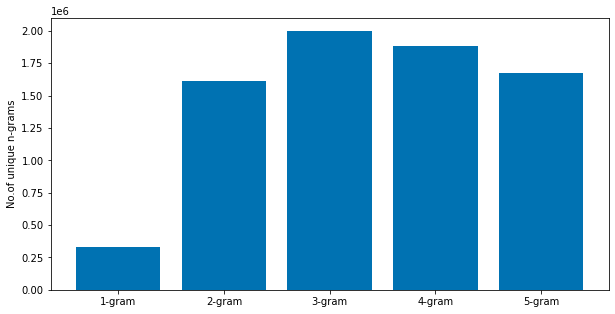

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(x = ["1-gram","2-gram","3-gram","4-gram","5-gram"], height = ngrams_count)
plt.ylabel("No.of unique n-grams")

In [ ]:
telugu_news_df["topic"].unique()

array([0, 1, 2, 3, 4])

In [ ]:
from indicnlp.tokenize import sentence_tokenize
def build_n_gram_vocab(n, tot_sentences_proc):
  if n > 1:
    n_grams_telugu_vocab = {}
    for sen in tot_sentences_proc:
      tokens = indic_tokenize.trivial_tokenize(sen)
      ngram = list(ngrams(tokens, n))
      for ngm in ngram:
        if tuple(ngm) not in n_grams_telugu_vocab:
          n_grams_telugu_vocab[tuple(ngm)] = 1
        else:
          n_grams_telugu_vocab[tuple(ngm)] += 1
    n_grams_telugu_vocab = {k: v for k, v in sorted(n_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}
  else:
    n_grams_telugu_vocab = {}
    for sen in tot_sentences_proc:
      tokens = indic_tokenize.trivial_tokenize(sen)
      ngram = list(ngrams(tokens, 1)) 
      for ngm in ngram:
        if ngm not in n_grams_telugu_vocab:
          n_grams_telugu_vocab[ngm] = 1
        else:
          n_grams_telugu_vocab[ngm] += 1
    n_grams_telugu_vocab = {k: v for k, v in sorted(n_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}
  return n_grams_telugu_vocab
def get_class_vocab(class_id, n_grams = 1):
  tot_text_class = ""
  for t in telugu_news_df[telugu_news_df["topic"] == class_id]["body_processed"]:
    tot_text_class += t
  tot_sentances_class = sentence_tokenize.sentence_split(tot_text_class, lang='te')
  vocab = build_n_gram_vocab(n_grams, tot_sentances_class)
  return vocab

In [ ]:
def get_prob_class_ngram(input_text, vocab, n_grams, class_id, laplace_param = 1):
  total_tokens = len(vocab)
  Prob_input = 1
  tokens = indic_tokenize.trivial_tokenize(input_text)
  vocab_n_1 = get_class_vocab(class_id, n_grams-1)
  if n_grams > 1:
    ngram = list(ngrams(tokens, n_grams))
    for ngm in ngram:
      prior_ngm = tuple(ngm[:n_grams-1])
      if prior_ngm in vocab_n_1:
        count_denom = vocab_n_1[prior_ngm]
      else:
        count_denom = 1
      if tuple(ngm) in vocab:
        count_w = vocab[tuple(ngm)]
      else:
        count_w = 0
      Prob_input *= ((count_w + laplace_param)/(count_denom+(laplace_param*len(vocab_n_1))))
  else:
    tokens = indic_tokenize.trivial_tokenize(sen)
    ngram = list(ngrams(tokens, 1))
    for ngm in ngram:
      if ngm in vocab:
        count_w = vocab[ngm]
      else:
        count_w = 0
      prob = count_w/total_tokens
      Prob_input *= count_w/total_tokens
  return Prob_input
def get_max_ind(arr):
  n = len(arr)
  max_ind = 0
  max_prob = arr[0]
  for i in range(1,n):
    if arr[i] > max_prob:
      max_ind = i
      max_prob = arr[i]
  return max_ind, max_prob
def classify_text(text, n_grams, laplace_param = 0):
  cls0_vocab = get_class_vocab(0, n_grams)
  cls1_vocab = get_class_vocab(1, n_grams)
  cls2_vocab = get_class_vocab(2, n_grams)
  cls3_vocab = get_class_vocab(3, n_grams)
  cls4_vocab = get_class_vocab(4, n_grams)
  probs_arr = []
  cls0_prob = get_prob_class_ngram(text, cls0_vocab, n_grams,0, laplace_param)
  cls1_prob = get_prob_class_ngram(text, cls1_vocab, n_grams,1, laplace_param)
  cls2_prob = get_prob_class_ngram(text, cls2_vocab, n_grams,2, laplace_param)
  cls3_prob = get_prob_class_ngram(text, cls3_vocab, n_grams,3, laplace_param)
  cls4_prob = get_prob_class_ngram(text, cls4_vocab, n_grams,4, laplace_param)
  probs_arr.append(cls0_prob)
  probs_arr.append(cls1_prob)
  probs_arr.append(cls2_prob)
  probs_arr.append(cls3_prob)
  probs_arr.append(cls4_prob)
  print(probs_arr)
  class_pred, prob_cls = get_max_ind(probs_arr)
  return class_pred, prob_cls

In [ ]:
text = "స్టార్ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటికీ కుటుంబంతో గడిపే అవకాశాన్ని ఏ మాత్రం వదులుకోవడం"
class_pred, prob = classify_text(text, 1)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[0.0, 0.0, 1.5854392079695025e-25, 0.0, 0.0]
Predticted class -> nation 
Predicted with probabilty =  1.5854392079695025e-23


In [ ]:
text = "స్టార్ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటికీ కుటుంబంతో గడిపే అవకాశాన్ని ఏ మాత్రం వదులుకోవడం"
class_pred, prob = classify_text(text, 2, laplace_param = 2)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[7.539467241817366e-52, 7.31668157691397e-51, 1.1717407701942233e-55, 6.301709540971078e-50, 9.973784159019319e-55]
Predticted class -> entertainment 
Predicted with probabilty =  6.301709540971078e-48


In [ ]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను"
class_pred, prob = classify_text(text, 2, laplace_param = 2)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[2.0110665825536858e-53, 3.024676982957221e-52, 7.831626215013029e-56, 3.126894856378308e-51, 1.6914625670477634e-55]
Predticted class -> entertainment 
Predicted with probabilty =  3.1268948563783083e-49


In [ ]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను దర్శకుడు రాజమౌళిని ప్రశంసలతో ముంచెత్తుతున్నారు"
class_pred, prob = classify_text(text, 3, laplace_param = 3)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[8.100269552898122e-77, 9.034344690378677e-75, 2.8067273076842573e-81, 8.737449308546919e-79, 4.301426135460897e-79]
Predticted class -> sports 
Predicted with probabilty =  9.034344690378676e-73


In [ ]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను దర్శకుడు రాజమౌళిని ప్రశంసలతో ముంచెత్తుతున్నారు"
class_pred, prob = classify_text(text, 4, laplace_param = 5)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[5.454295653100135e-73, 8.120930489231527e-71, 4.8162484724192635e-77, 1.3511229185333792e-75, 2.7514511154241185e-74]
Predticted class -> sports 
Predicted with probabilty =  8.120930489231528e-69


In [ ]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను దర్శకుడు రాజమౌళిని ప్రశంసలతో ముంచెత్తుతున్నారు"
class_pred, prob = classify_text(text, 5, laplace_param = 5)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[9.383043939066722e-68, 1.1700941656830867e-65, 2.1836803718626474e-71, 4.175812490954377e-70, 1.0438681175394662e-68]
Predticted class -> sports 
Predicted with probabilty =  1.1700941656830867e-63


In [ ]:
test_path = "/content/drive/MyDrive/nlp/test_telugu_news.csv"
test_news_df = pd.read_csv(test_path)
del test_news_df["heading"]
del test_news_df["SNo"]
del test_news_df["date"]
test_news_df.head()

,body,topic
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment


In [ ]:
y_test = test_news_df["topic"].apply(func_topic)
del test_news_df["topic"]

In [ ]:
test_news_df["body_processed"] = test_news_df["body"].str.replace('\u200c', '')
test_news_df["body_processed"] = test_news_df["body_processed"].str.replace('\n', '')
test_news_df["body_processed"] = test_news_df["body_processed"].str.replace('\t', '')
test_news_df["body_processed"] = test_news_df["body_processed"].str.replace('\xa0', '')
test_news_df["body_processed"] = test_news_df["body_processed"].apply(lambda text: remove_punctuation(text))
del test_news_df["body"]
test_news_df.head()

,body_processed
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...
3,నేటి మధ్యాహ్నం 159కి కౌంట్డౌన్ షురూశ్రీహరికోట ...
4,‘ఏమి రా అబ్బి యాడికి పోయినావు’ అంటూ రాయలసీమ యా...


In [ ]:
categories = [i for i in range(5)]
test_text = []
for t in test_news_df["body_processed"]:
  test_text.append(t)

In [ ]:
x_test = test_text
print(len(x_test) , len(y_test))

4329 4329


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
categories = [i for i in range(5)]
text_topic = []
for i in range(5):
  curr_text = ""
  for text in telugu_news_df[telugu_news_df["topic"] == i]["body_processed"]:
    curr_text += text
    curr_text += " "
  text_topic.append(curr_text)

In [ ]:
len(text_topic)
for i in range(5):
  print(len(text_topic[i]))

3303990
2092003
6725085
5737025
6077143


In [ ]:
from indicnlp.tokenize import indic_tokenize  
def get_all_vocab(tot_text):
  dic = {}
  for t in indic_tokenize.trivial_tokenize(tot_text): 
    if t not in dic:
      dic[t] = 1
    else:
      dic[t] += 1
  return dic 
tot_text = ""
for i in range(5):
  tot_text += text_topic[i]

In [ ]:
tot_vocab = get_all_vocab(tot_text)
tot_vocab = {k: v for k, v in sorted(tot_vocab.items(), key=lambda item: item[1], reverse = True)}
print(len(tot_vocab))

316736


In [ ]:
x_train = text_topic
y_train = categories

In [ ]:
import regex 
from indicnlp.tokenize import indic_tokenize
def custom_analyzer(text):
    words = regex.findall(r'\w{1,}', text) #extract words of at least 2 letters
    for w in words:
        yield w

In [ ]:
# We are using both uni-grams and bi-grams here to get the feature vectors
# We selected only the top 100000 words from the corpus to represent our data
count_vec = CountVectorizer(max_df = 0.75,min_df=0.1, lowercase = False , analyzer = custom_analyzer, max_features=100000, ngram_range=(1,2))
x_train_features = count_vec.fit_transform(x_train)

In [ ]:
x_train_features.shape

(5, 100000)

In [ ]:
# Stop words identified from the corpus by using the term-frequencies and the inverse document frequencies
len(count_vec.stop_words_)

201776

In [ ]:
x_test_features = count_vec.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_features, y_train)
MultinomialNB()

MultinomialNB()

In [ ]:
print("Test score :- ", clf.score(x_test_features, y_test))

Test score :-  0.933933933933934


In [ ]:
from sklearn.metrics import classification_report
y_pred_test = clf.predict(x_test_features)
target_names = list(inv_topic_dict.values())

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

               precision    recall  f1-score   support

     business       0.88      0.97      0.92       653
       sports       0.97      0.94      0.96       437
       nation       0.95      0.90      0.93      1673
entertainment       0.96      0.98      0.97      1289
    editorial       0.80      0.83      0.82       277

     accuracy                           0.93      4329
    macro avg       0.91      0.92      0.92      4329
 weighted avg       0.94      0.93      0.93      4329



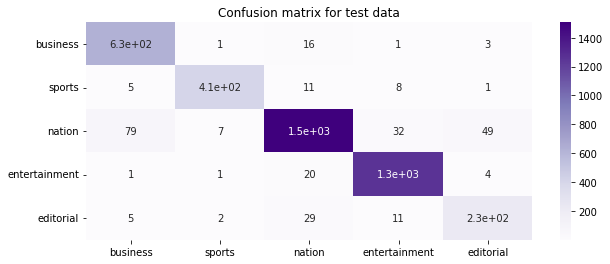

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score
confusion_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,4))
plt.title("Confusion matrix for test data")
plt.xlabel("Predicted class")
plt.ylabel("True class")
sns.heatmap(confusion_mat, annot=True, cmap="Purples",  xticklabels = target_names, yticklabels=target_names)
plt.show()

In [ ]:
def predict_text_sample(test_text, inv_topic_dict, clf, count_vec):
  test_sample = [test_text]
  x_test_sample_fetaures = count_vec.transform(test_sample)
  y_pred_test_sample = clf.predict(x_test_sample_fetaures)
  return inv_topic_dict[y_pred_test_sample[0]]

In [ ]:
test_text ="ఇండియన్ స్క్రీన్ మీద పోటీ పడటం అయిపోయింది అందుకే ఇప్పుడు మన సినిమాలు ఫారిన్ రిలీజ్ లో పోటీ పడుతున్నాయి. ఇండియన్ సినిమాలు ముఖ్యంగా సౌత్ సినిమాలు రిలీజ్ అవుతున్నాయి అంటే వరల్డ్ వైడ్ మార్కెట్ ఓపెన్ అవుతుంది. తెలుగు తమిళ హిందీ భాషల సినిమాలు సబ్ టైటిల్స్ తో విధేశాల్లో కూడా రిలీజ్ అవుతున్నాయి"
print("Prediced class is " , predict_text_sample(test_text, inv_topic_dict, clf, count_vec))

Prediced class is  entertainment


In [ ]:
test_text = "హైదరాబాద్: తెలంగాణలో సంచలనం సృష్టించిన ‘ఎమ్మెల్యేలకు ఎర’ కేసులో హైకోర్టు కీలక తీర్పు వెల్లడించింది. ఈ కేసులో ముగ్గురు నిందితుల రిమాండ్‌కు ఉన్నత న్యాయస్థానం అనుమతించింది. నిందితులు వెంటనే సైబరాబాద్ కమిషనర్‌ స్టీఫెన్‌ రవీంద్ర ఎదుట లొంగిపోవాలని ఆదేశించింది. ఒకవేళ లొంగిపోకపోతే వారిని అరెస్టు చేసి ఏసీబీ కోర్టులో హాజరుపర్చాలని.. ఆ తర్వాత రిమాండ్‌కు తరలించాలని పోలీసులను ధర్మాసనం ఆదేశించింది."
print("Prediced class is " , predict_text_sample(test_text, inv_topic_dict, clf, count_vec))

Prediced class is  nation


In [ ]:
test_text = "టీ20 ప్రప్రంచకప్‌లో టీమ్‌ఇండియా ఆడటానికి ముందు న్యూజిలాండ్‌తో వార్మప్‌ మ్యాచ్‌ జరగాల్సి ఉంది. అయితే వర్షం కారణంగా రద్దైంది. ఆ తర్వాత పాకిస్థాన్‌తో మెల్‌బోర్న్‌ వేదికగా మ్యాచ్‌కు వరుణుడి గండం ఉందని వార్తలు వచ్చాయి. దీంతో సోషల్‌ మీడియాలో మీమ్స్‌ కూడా భారీ స్థాయిలో ట్రోల్‌ అయ్యాయి. అయితే వాతావరణం అనుకూలంగా మారడంతో దాయాదుల పోరును అక్టోబర్‌ 23న వీక్షించే అవకాశం అభిమానులకు దక్కింది. ఉత్కంఠపోరులో టీమ్‌ఇండియా విజయం సాధించిన విషయం తెలిసిందే. "
print("Prediced class is " , predict_text_sample(test_text, inv_topic_dict, clf, count_vec))

Prediced class is  sports
